# Assignment Info:
Assignment 3: Computer Vision Assignment <br>
CSE366, Sec:4 <br>

Name: Md. Iftekhar Hossain Khan <br>
ID: 2020-3-60-073 <br>
Course Instructor: Dr. Mohammad Rifat Ahmmad Rashid (Assistant Professor, CSE)<br>
East West University


#Option 2: Object Detection
Dataset: Use the dataset available at this link. This dataset includes images for object
detection tasks.<br>
Link: https://data.mendeley.com/datasets/8h3s6jkyff/1 <br>

Model Implemented:
* YOLOv8


Task: <br>
Focus on detecting objects within the images, quantifying the precision, recall, and mAP (mean
Average Precision) of your model. Additionally, discuss the challenges faced during model
implementation and tuning.

## Checking if GPU available

In [ ]:
!nvidia-smi

Thu May 23 05:46:06 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   52C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

# Checking default directory path of Google Colab

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Installing YOLOv8

In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.9/78.2 GB disk)


In [ ]:
from ultralytics import YOLO
from IPython.display import display, Image

# Downloading dataset from Roboflow

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="3pwpSZGyJW2FVB30wqmQ")
project = rf.workspace("tomato-v0dw0").project("tomato-wdv9z")
version = project.version(1)
dataset = version.download("yolov8")

/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.9/74.9 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 9.0 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.7
    Uninstalling idna-3.7:
      Successfully uninstalled idna-3.7
  Attempting uninstall: cycler
    Found existing installation: cycler 0.12.1
    Uninstalling cycler-0.12.1:
      Successfully unins

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to tomato-1 in yolov8:: 100%|██████████| 1600/1600 [00:00<00:00, 4716.46it/s]


## Custom Training

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=800 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 234MB/s]
New https://pypi.org/project/ultralytics/8.2.19 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/tomato-1/data.yaml, epochs=25, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml					    R_curve.png		val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		val_batch0_pred.jpg
confusion_matrix.png				    results.png		val_batch1_labels.jpg
events.out.tfevents.1716443330.036097882c27.1162.0  train_batch0.jpg	val_batch1_pred.jpg
F1_curve.png					    train_batch1.jpg	val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch2.jpg	val_batch2_pred.jpg
labels.jpg					    train_batch600.jpg	weights
P_curve.png					    train_batch601.jpg
PR_curve.png					    train_batch602.jpg


# Confusion Matrix of the dataset

/content


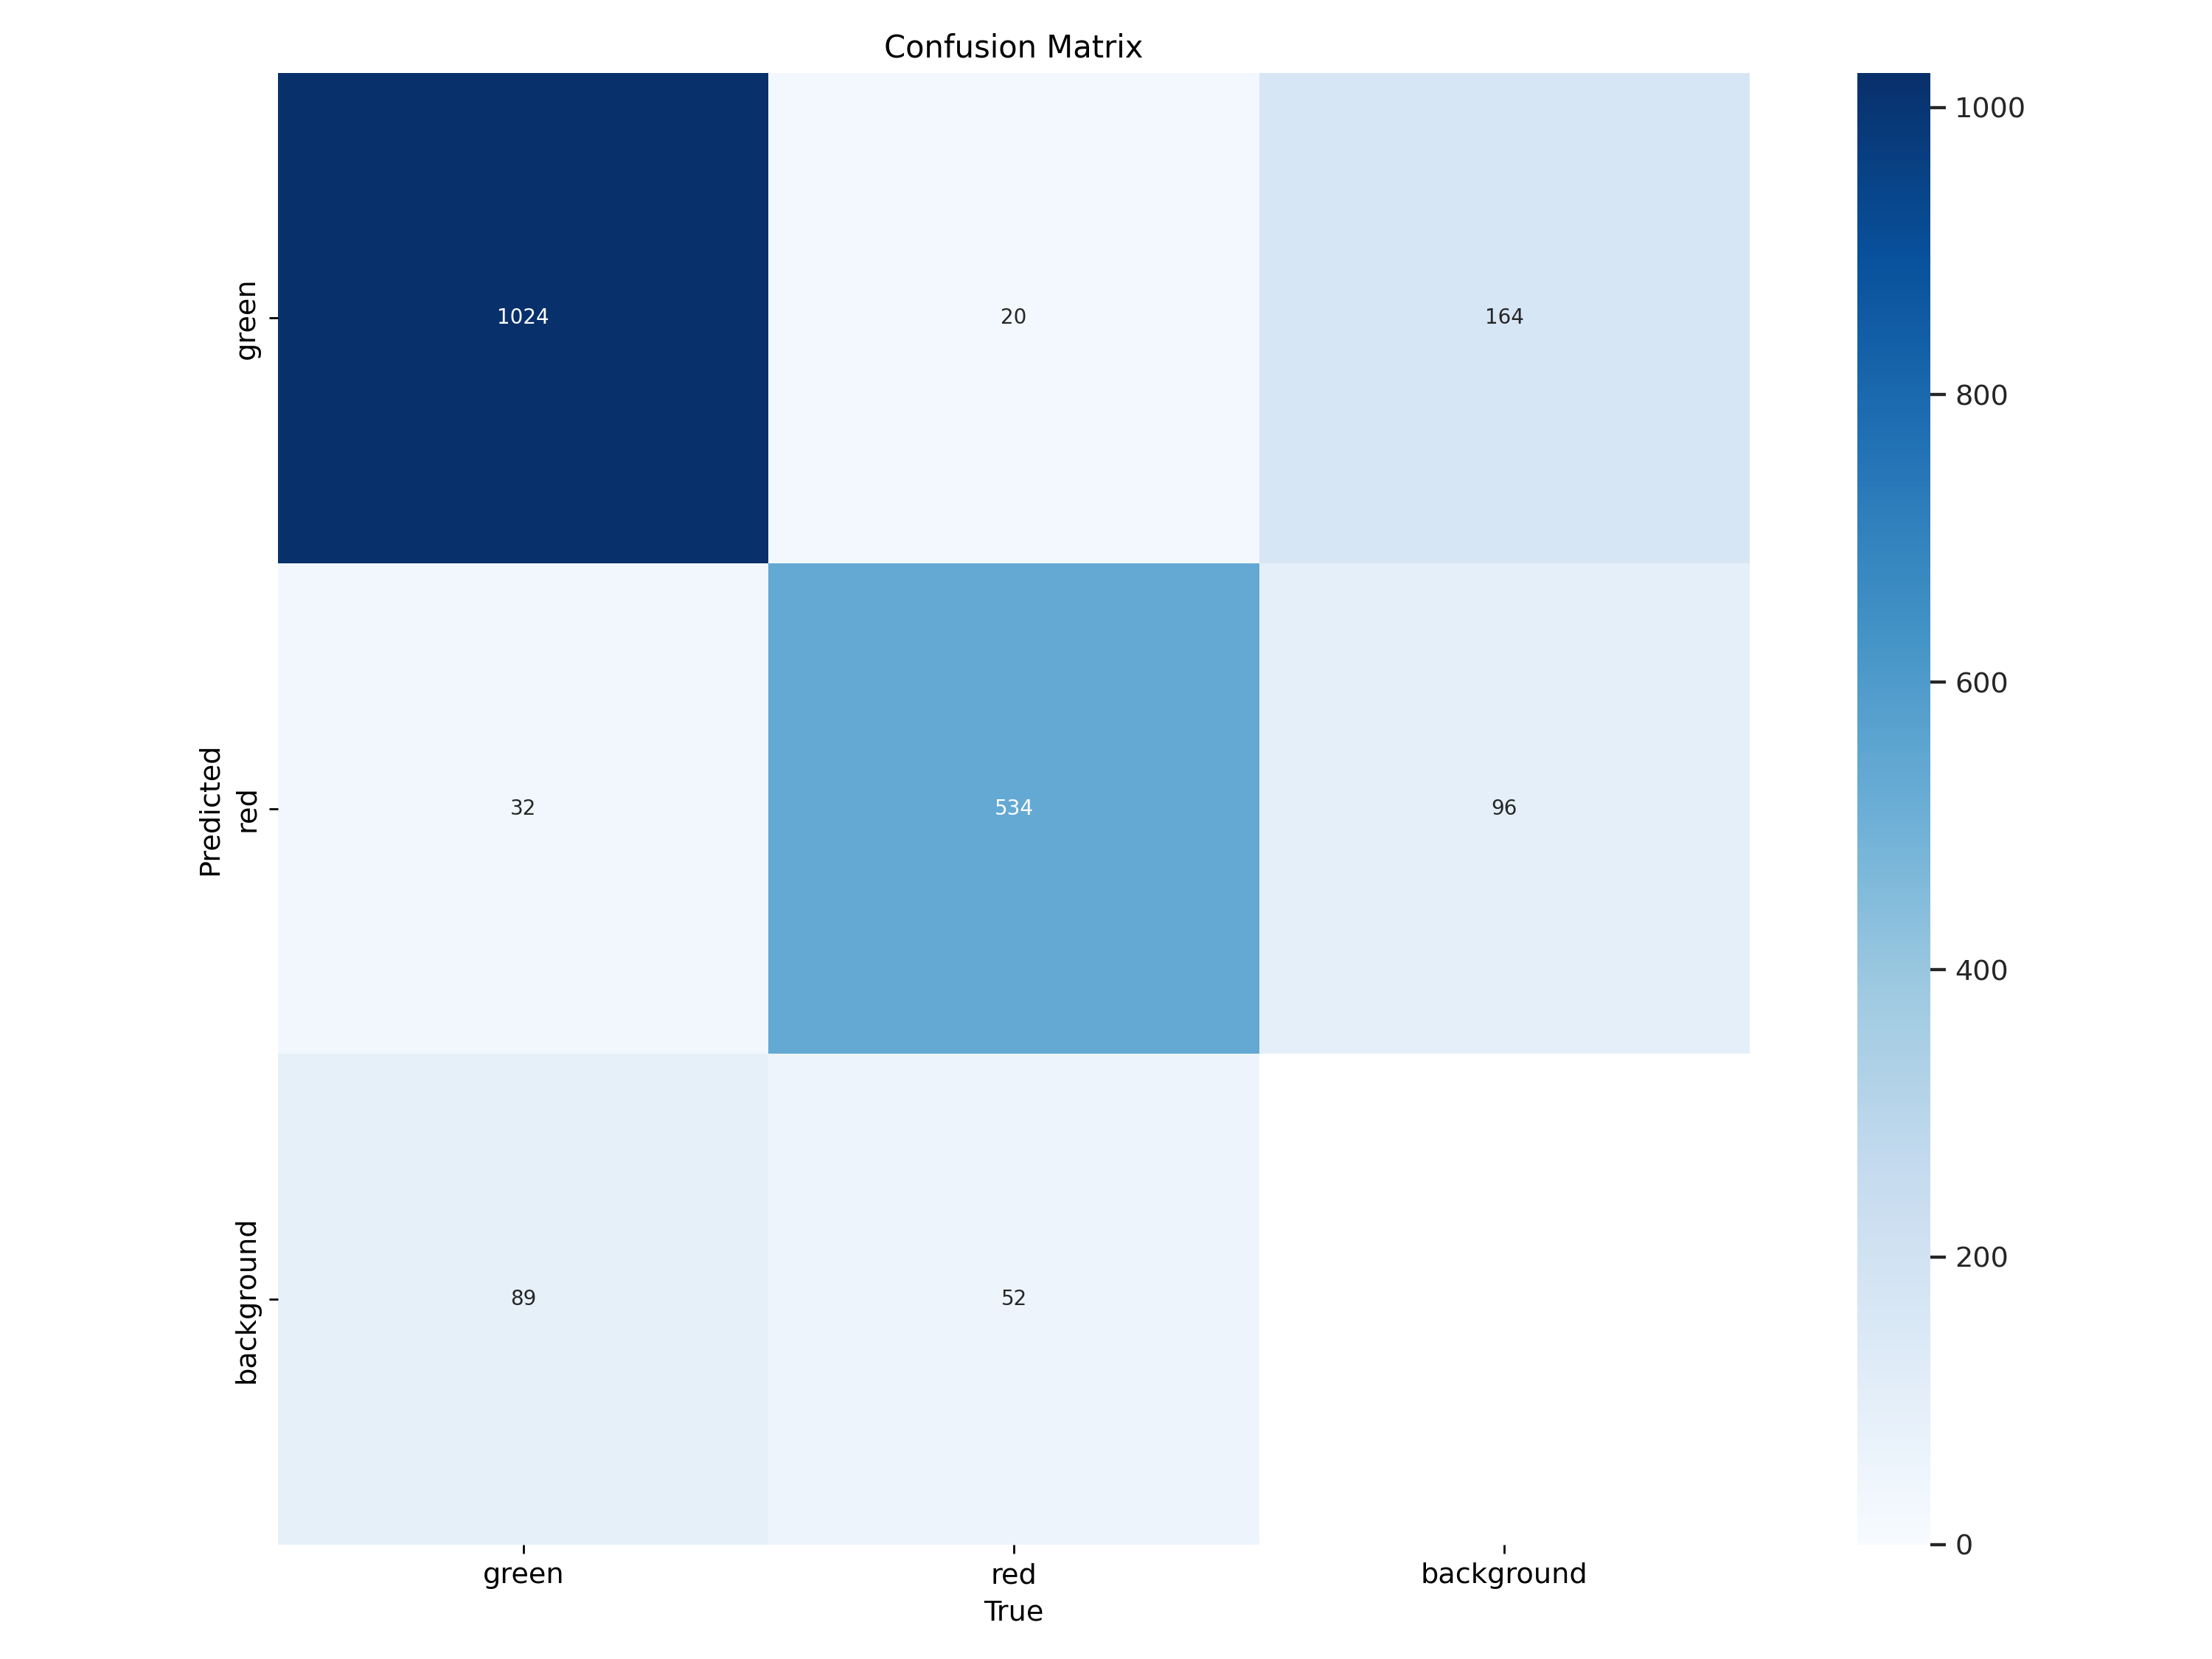

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

# Train Result

/content


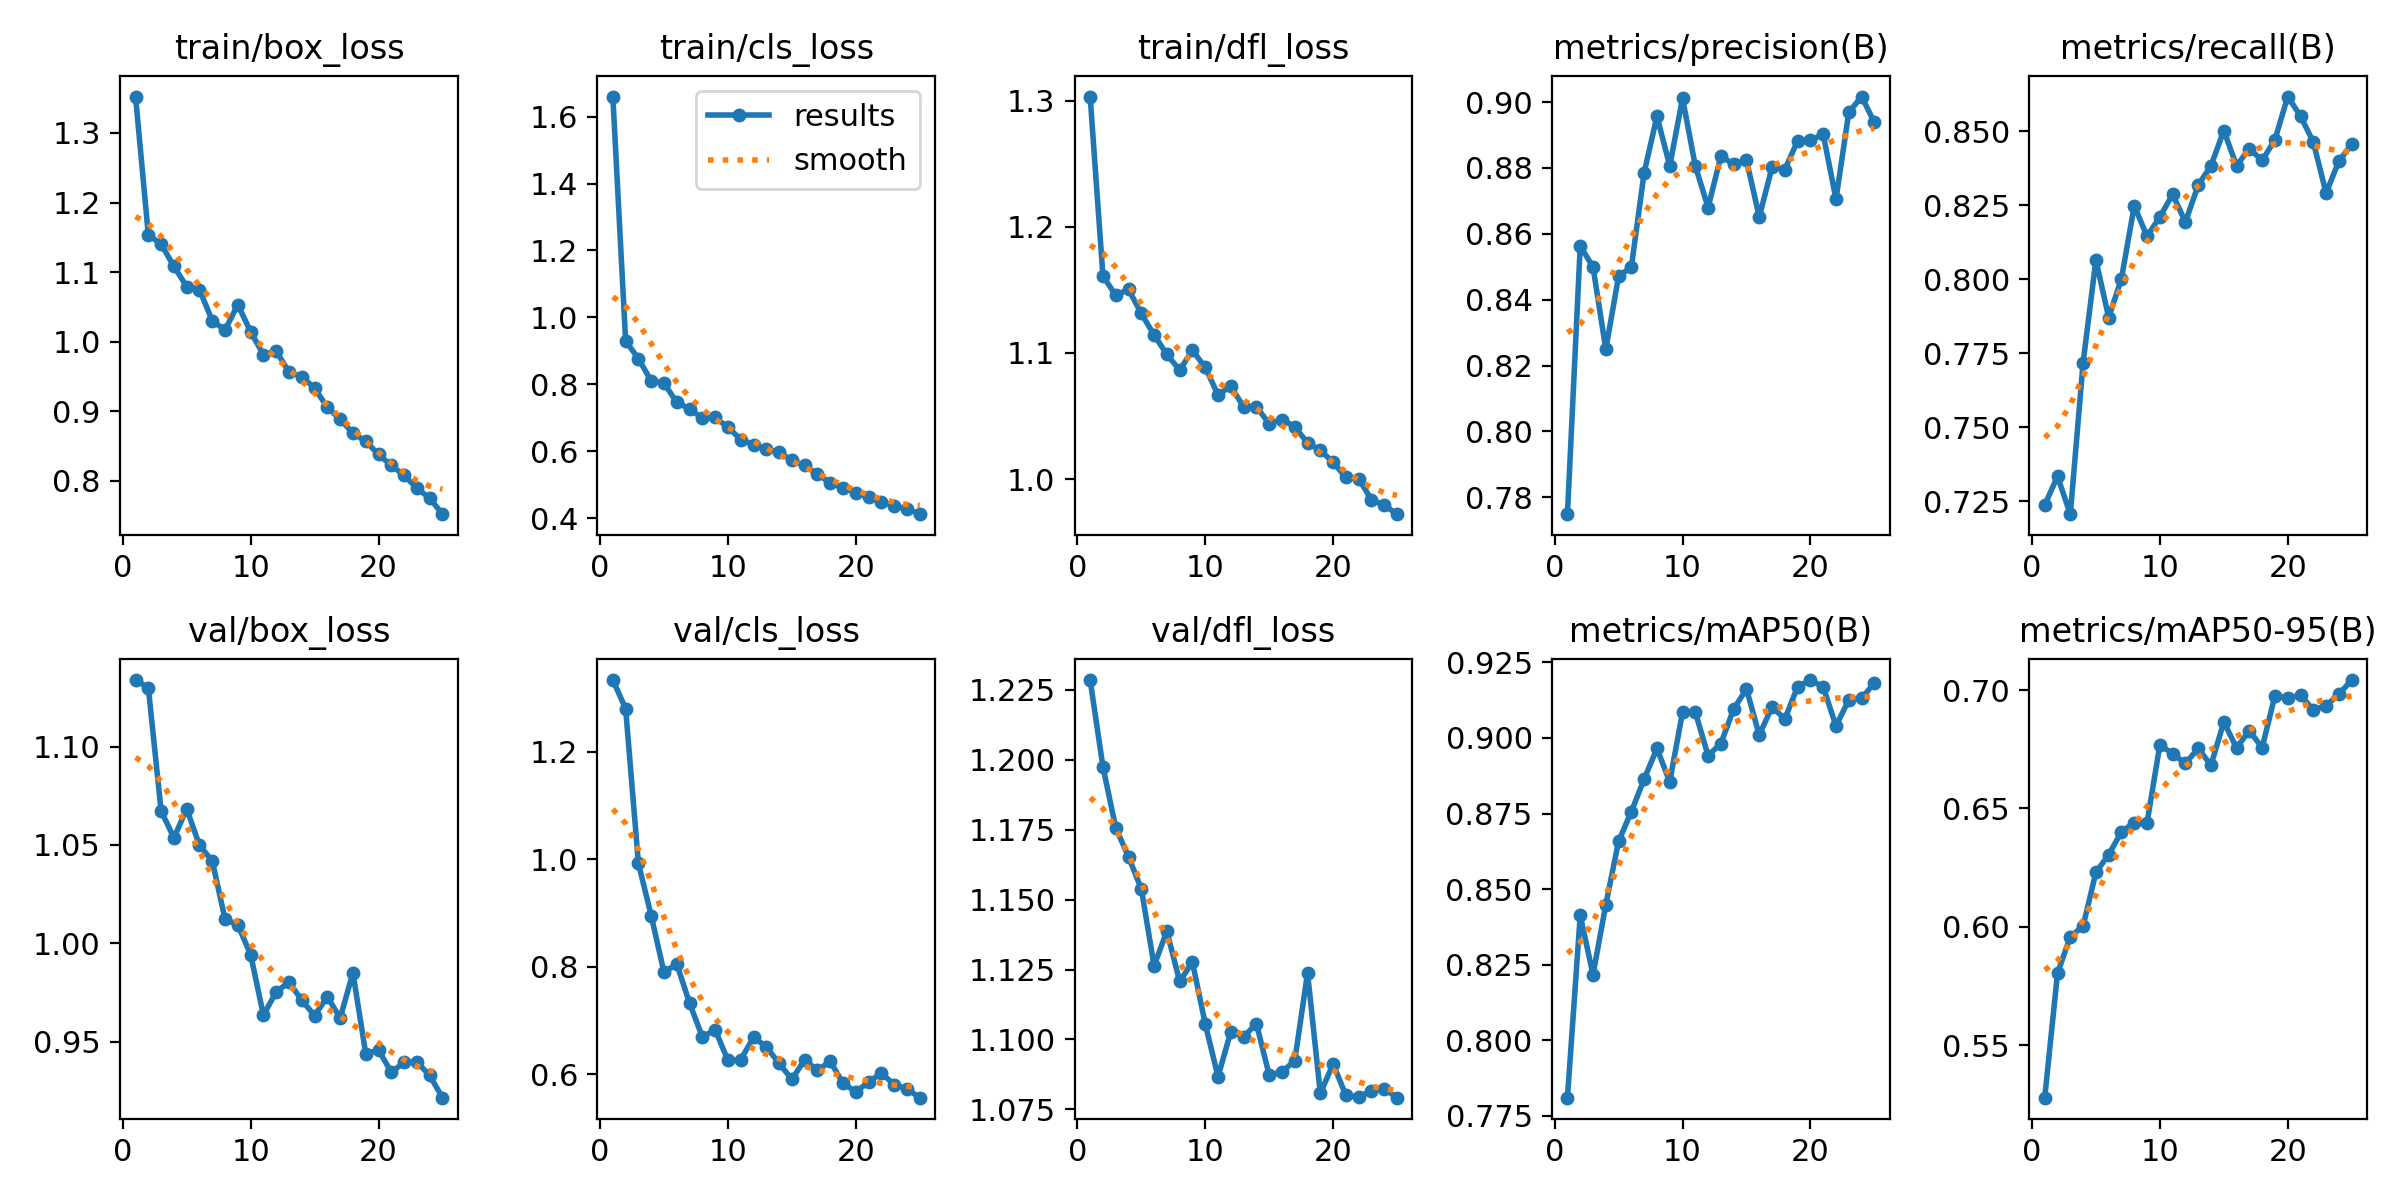

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

# Preview of the trained result

/content


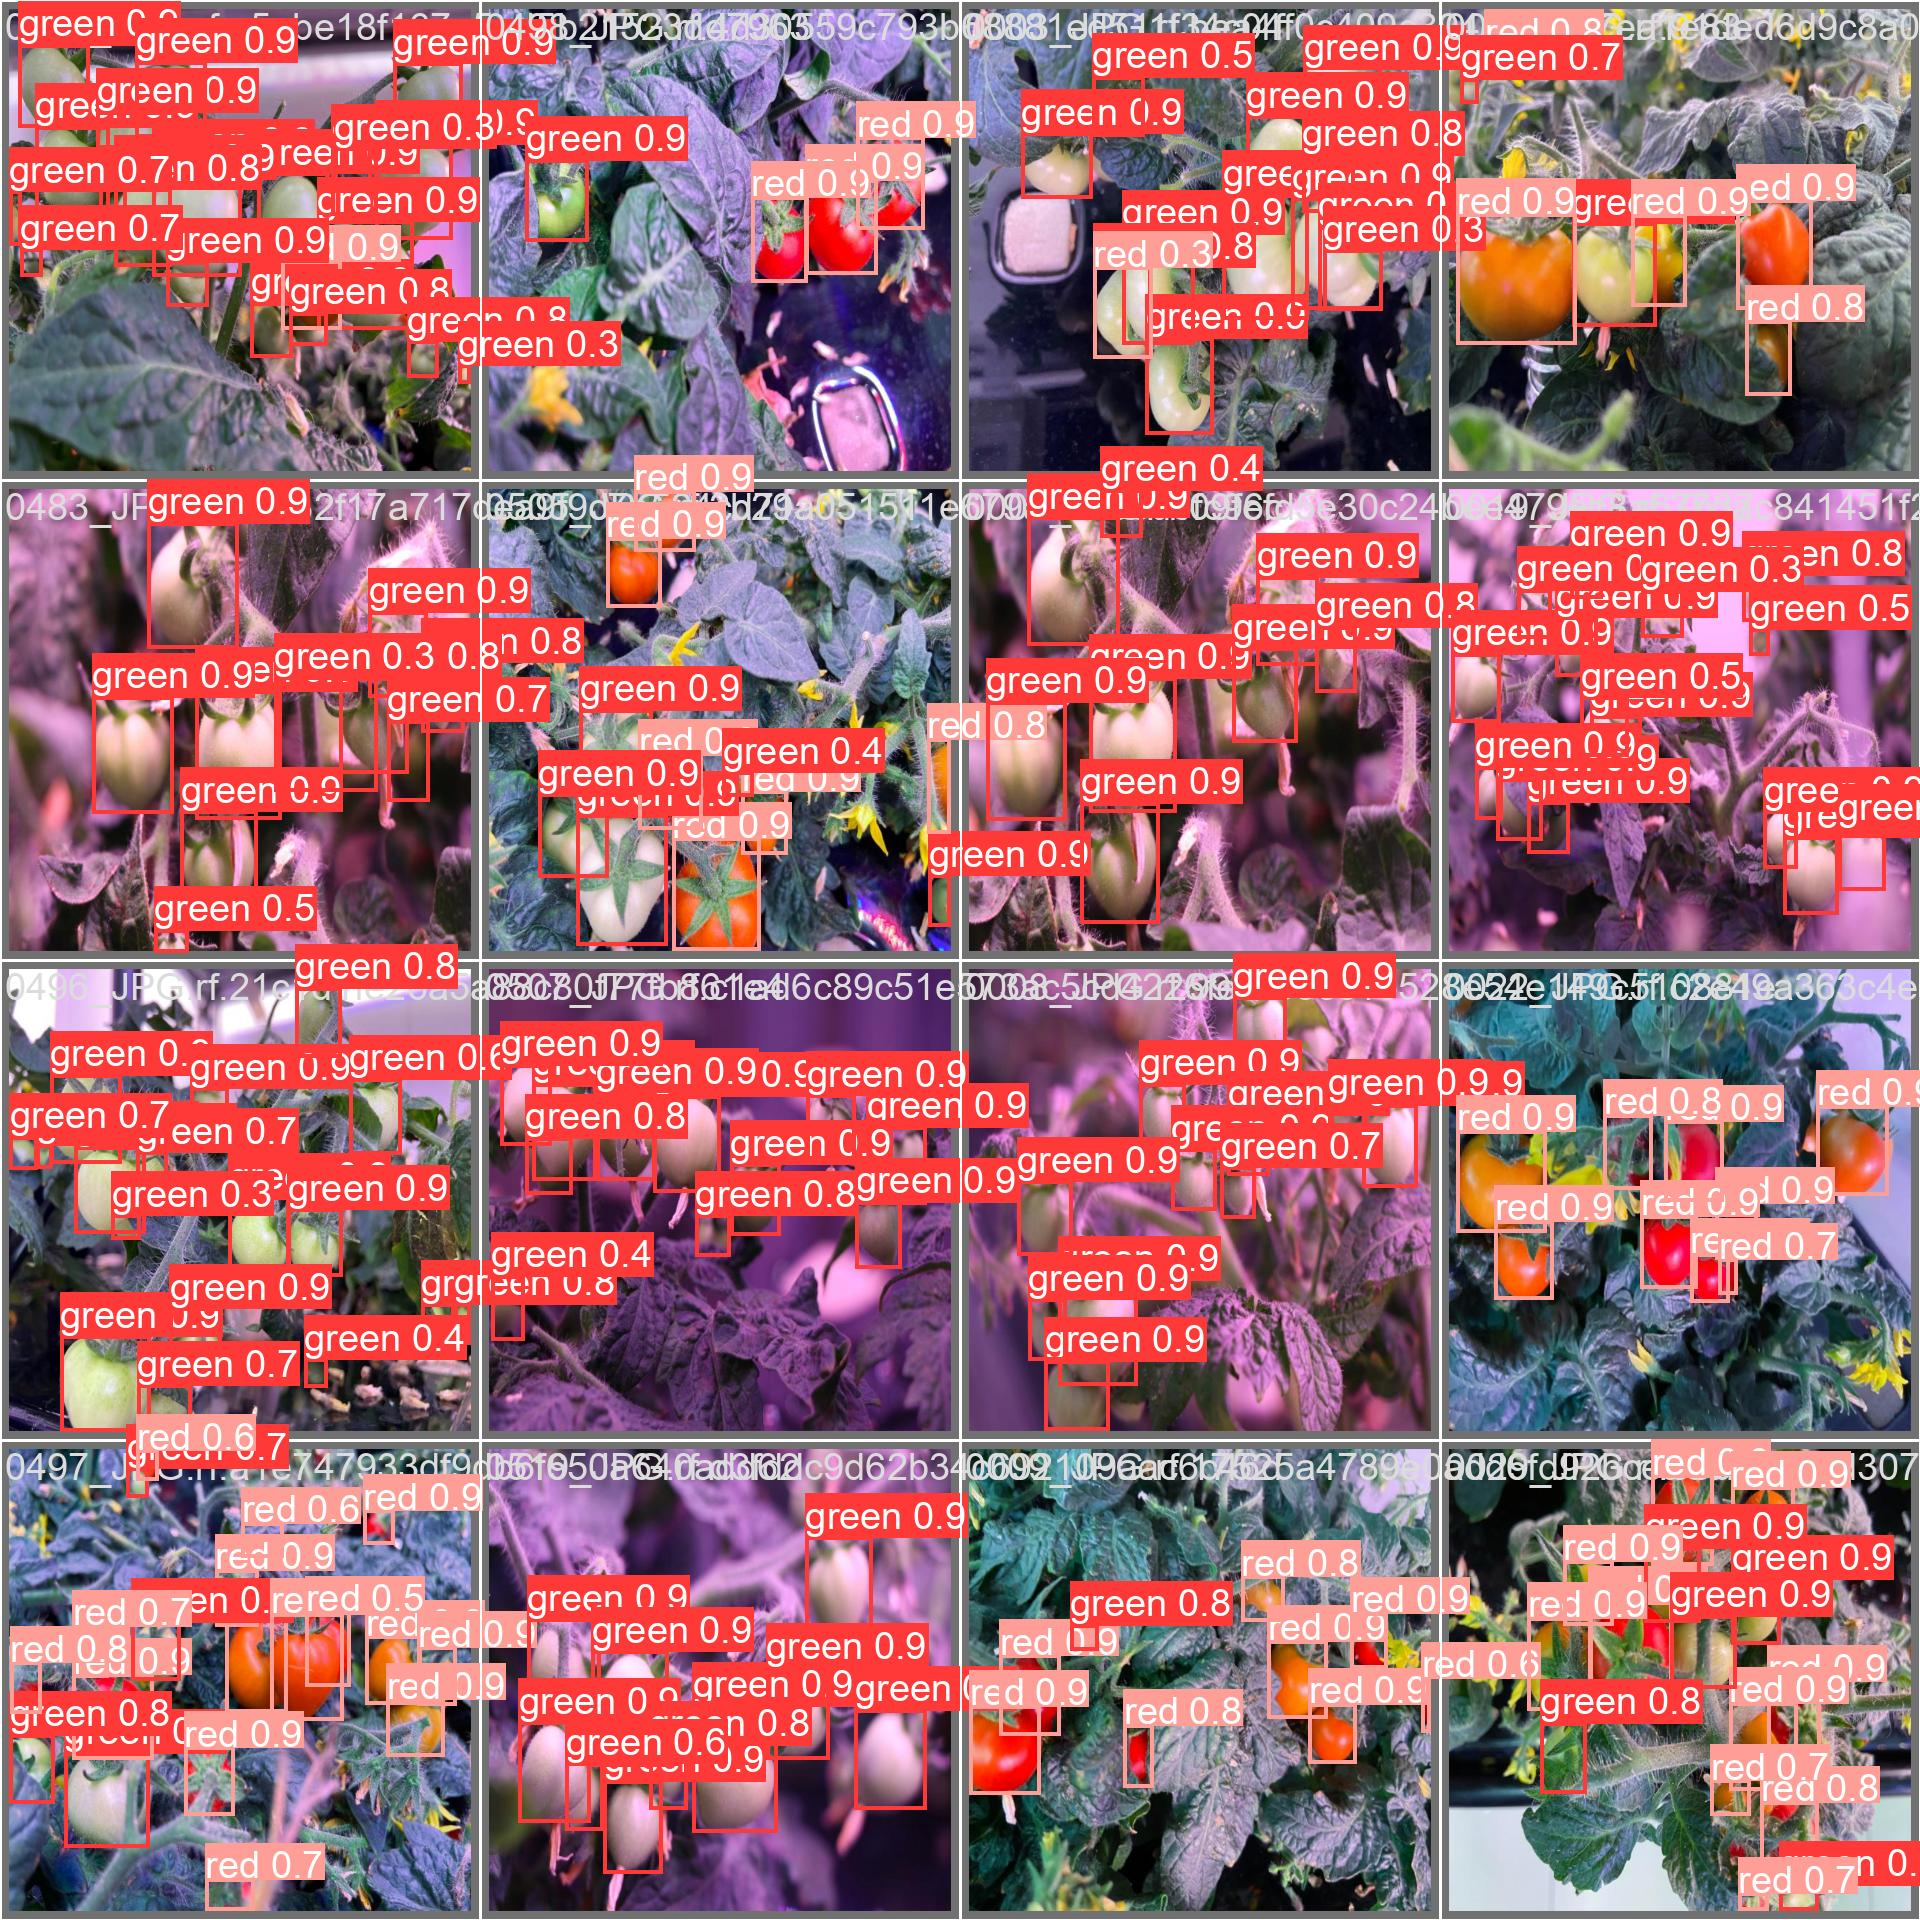

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validating Custom Model

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/tomato-1/valid/labels.cache... 104 images, 0 backgrounds, 0 corrupt: 100% 104/104 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0% 0/7 [00:00<?, ?it/s]WARNING ⚠️ NMS time limit 1.300s exceeded
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 7/7 [00:12<00:00,  1.75s/it]
                   all        104       1751      0.892      0.763      0.838      0.641
                 green        104       1145      0.909      0.771      0.859      0.652
                   red        104        606      0.875      0.754      0.817       0.63
Speed: 8.4ms preprocess, 15.8ms inference, 0.0ms loss, 19.1ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://do

## Inference with Custom Model

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/52 /content/datasets/tomato-1/test/images/0015_JPG.rf.37cb9e34eaaf171c296e76233ac44047.jpg: 800x800 19 greens, 22.5ms
image 2/52 /content/datasets/tomato-1/test/images/0026_JPG.rf.15fcf2e7471424e4ae4527dbe6572c29.jpg: 800x800 14 greens, 5 reds, 22.5ms
image 3/52 /content/datasets/tomato-1/test/images/0048_JPG.rf.e433c2fcd260691c72543dfd7d38c990.jpg: 800x800 33 greens, 22.4ms
image 4/52 /content/datasets/tomato-1/test/images/0058_JPG.rf.01de2e81117da307660586eb87fca55e.jpg: 800x800 21 greens, 22.4ms
image 5/52 /content/datasets/tomato-1/test/images/0060_JPG.rf.b9769c1ee290183db331b31606faf6ce.jpg: 800x800 31 greens, 22.4ms
image 6/52 /content/datasets/tomato-1/test/images/0065_JPG.rf.c20cac4b0d0b06ee7235e4fee362a088.jpg: 800x800 4 greens, 5 reds, 22.4ms
image 7/

# Inference Result Preview

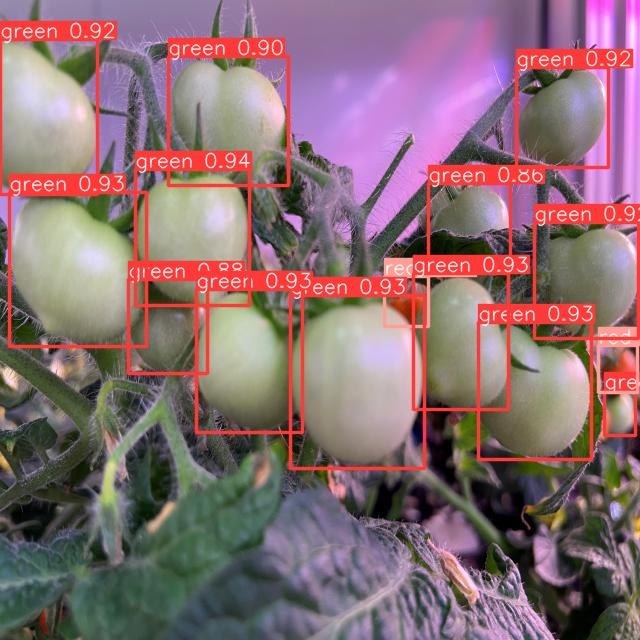

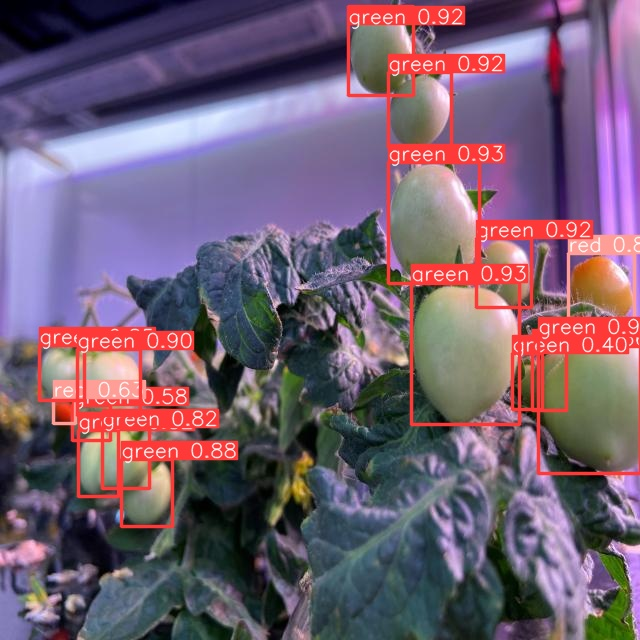

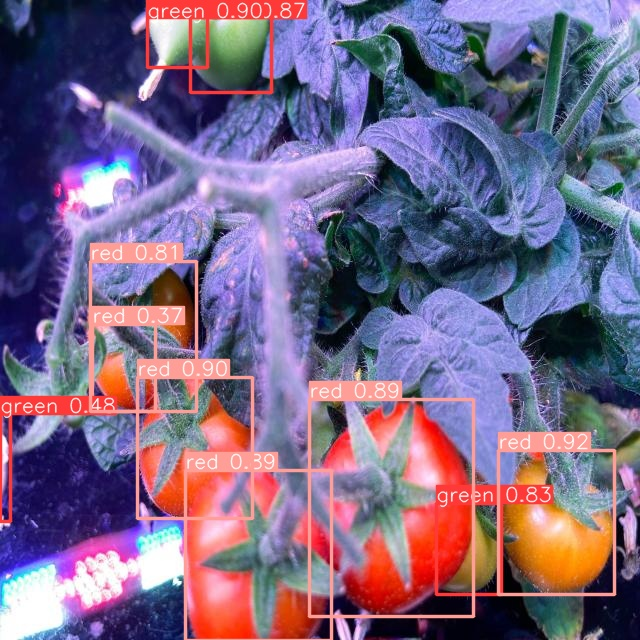

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

## Deploy model on Roboflow

In [ ]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train/")

View the status of your deployment at: https://app.roboflow.com/tomato-v0dw0/tomato-wdv9z/1
Share your model with the world at: https://universe.roboflow.com/tomato-v0dw0/tomato-wdv9z/model/1


# Running inference on the model on the cloud API of Roboflow

###Installing inference-sdk

In [ ]:
!pip install inference-sdk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 6.8 MB/s eta 0:00:00


In [ ]:
# import the inference-sdk
from inference_sdk import InferenceHTTPClient

# initialize the client
CLIENT = InferenceHTTPClient(
    api_url="https://detect.roboflow.com",
    api_key="3pwpSZGyJW2FVB30wqmQ"
)

# # infer on a local image
# result = CLIENT.infer("YOUR_IMAGE.jpg", model_id="tomato-wdv9z/1")



In [ ]:
#Run inference on your model on a persistant, auto-scaling, cloud API

#load model
model = project.version(dataset.version).model

#choose random test set image
import os, random
test_set_loc = "/content/datasets/tomato-1/test/images/"
random_test_image = random.choice(os.listdir(test_set_loc))
print("running inference on " + random_test_image)

pred = model.predict(test_set_loc + random_test_image, confidence=40, overlap=30).json()
pred

running inference on 0321_JPG.rf.f3949dd199030d7e8043ff18e43ff707.jpg


{'predictions': [{'x': 169.5,
   'y': 401.5,
   'width': 57.0,
   'height': 85.0,
   'confidence': 0.9055690765380859,
   'class': 'green',
   'class_id': 0,
   'detection_id': 'ce5461fd-47da-4701-a25b-620fa967af8b',
   'image_path': '/content/datasets/tomato-1/test/images/0321_JPG.rf.f3949dd199030d7e8043ff18e43ff707.jpg',
   'prediction_type': 'ObjectDetectionModel'},
  {'x': 303.5,
   'y': 550.0,
   'width': 63.0,
   'height': 86.0,
   'confidence': 0.9001030921936035,
   'class': 'green',
   'class_id': 0,
   'detection_id': 'bed3280c-4704-4b6d-960c-c4d15a6db3e4',
   'image_path': '/content/datasets/tomato-1/test/images/0321_JPG.rf.f3949dd199030d7e8043ff18e43ff707.jpg',
   'prediction_type': 'ObjectDetectionModel'},
  {'x': 267.0,
   'y': 411.0,
   'width': 54.0,
   'height': 70.0,
   'confidence': 0.8945148587226868,
   'class': 'green',
   'class_id': 0,
   'detection_id': '6bceb4aa-ab45-4f00-a158-844c33bdff3b',
   'image_path': '/content/datasets/tomato-1/test/images/0321_JPG.rf.